In [1]:
import pandas as pd
import numpy as np


In [2]:
data = {

    "Business": [
        "DRIP Chicken",
        "Alabama Fried Chicken"
    ],

    "City": [
        "Manchester",
        "Manchester"
    ],

    "Average Meal Price (£)": [
        13.50,
        7.50
    ],

    "Average Combo Price (£)": [
        17.95,
        8.99
    ],

    "Min Price (£)": [
        7.95,
        6.99
    ],

    "Max Price (£)": [
        29.99,
        14.99
    ],

    "Target Customer": [
        "Students, young adults, premium buyers",
        "Families, workers, budget customers"
    ],

    "Customer Volume Per Day": [
        220,
        350
    ]
}

df = pd.DataFrame(data)

df


,Business,City,Average Meal Price (£),Average Combo Price (£),Min Price (£),Max Price (£),Target Customer,Customer Volume Per Day
0,DRIP Chicken,Manchester,13.5,17.95,7.95,29.99,"Students, young adults, premium buyers",220
1,Alabama Fried Chicken,Manchester,7.5,8.99,6.99,14.99,"Families, workers, budget customers",350


In [3]:
df["Daily Revenue (£)"] = df["Customer Volume Per Day"] * df["Average Meal Price (£)"]

df["Weekly Revenue (£)"] = df["Daily Revenue (£)"] * 7

df["Yearly Revenue (£)"] = df["Weekly Revenue (£)"] * 52

df


,Business,City,Average Meal Price (£),Average Combo Price (£),Min Price (£),Max Price (£),Target Customer,Customer Volume Per Day,Daily Revenue (£),Weekly Revenue (£),Yearly Revenue (£)
0,DRIP Chicken,Manchester,13.5,17.95,7.95,29.99,"Students, young adults, premium buyers",220,2970.0,20790.0,1081080.0
1,Alabama Fried Chicken,Manchester,7.5,8.99,6.99,14.99,"Families, workers, budget customers",350,2625.0,18375.0,955500.0


In [4]:
import numpy as np

cities = ["Manchester", "London", "Birmingham", "Leeds", "Liverpool", "Glasgow"]

dataset = []

for city in cities:
    
    drip_customers = np.random.randint(180, 320)
    alabama_customers = np.random.randint(250, 450)
    
    drip_price = 13.50
    alabama_price = 7.50
    
    drip_weekly = drip_customers * 7 * drip_price
    alabama_weekly = alabama_customers * 7 * alabama_price
    
    dataset.append({
        "City": city,
        "Business": "DRIP Chicken",
        "Customers Per Day": drip_customers,
        "Weekly Revenue": drip_weekly,
        "Yearly Revenue": drip_weekly * 52,
        "Weekly Profit": drip_weekly * 0.30,
        "Yearly Profit": drip_weekly * 52 * 0.30
    })
    
    dataset.append({
        "City": city,
        "Business": "Alabama Fried Chicken",
        "Customers Per Day": alabama_customers,
        "Weekly Revenue": alabama_weekly,
        "Yearly Revenue": alabama_weekly * 52,
        "Weekly Profit": alabama_weekly * 0.25,
        "Yearly Profit": alabama_weekly * 52 * 0.25
    })

df_full = pd.DataFrame(dataset)

df_full


,City,Business,Customers Per Day,Weekly Revenue,Yearly Revenue,Weekly Profit,Yearly Profit
0,Manchester,DRIP Chicken,213,20128.5,1046682.0,6038.550,314004.6
1,Manchester,Alabama Fried Chicken,358,18795.0,977340.0,4698.750,244335.0
2,London,DRIP Chicken,300,28350.0,1474200.0,8505.000,442260.0
3,London,Alabama Fried Chicken,391,20527.5,1067430.0,5131.875,266857.5
4,Birmingham,DRIP Chicken,181,17104.5,889434.0,5131.350,266830.2
5,Birmingham,Alabama Fried Chicken,430,22575.0,1173900.0,5643.750,293475.0
6,Leeds,DRIP Chicken,273,25798.5,1341522.0,7739.550,402456.6
7,Leeds,Alabama Fried Chicken,354,18585.0,966420.0,4646.250,241605.0
8,Liverpool,DRIP Chicken,276,26082.0,1356264.0,7824.600,406879.2
9,Liverpool,Alabama Fried Chicken,293,15382.5,799890.0,3845.625,199972.5


In [5]:
def predict_profit(customers_per_day, avg_price, profit_margin):
    
    weekly_revenue = customers_per_day * avg_price * 7
    yearly_revenue = weekly_revenue * 52
    
    weekly_profit = weekly_revenue * profit_margin
    yearly_profit = yearly_revenue * profit_margin
    
    return weekly_profit, yearly_profit


predict_profit(300, 12, 0.30)


(7560.0, 393120.0)

In [6]:
demographics = {

    "Group": [
        "Students",
        "Office Workers",
        "Families",
        "Nightlife Customers",
        "Delivery App Users"
    ],

    "DRIP Chicken %": [
        45,
        20,
        10,
        15,
        10
    ],

    "Alabama Fried Chicken %": [
        25,
        20,
        30,
        15,
        10
    ]
}

pd.DataFrame(demographics)


,Group,DRIP Chicken %,Alabama Fried Chicken %
0,Students,45,25
1,Office Workers,20,20
2,Families,10,30
3,Nightlife Customers,15,15
4,Delivery App Users,10,10


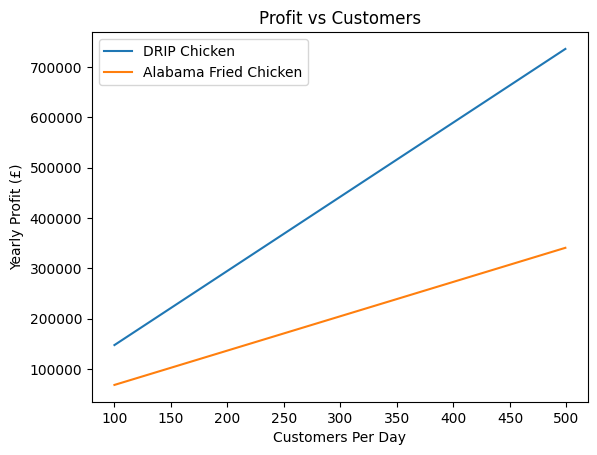

In [7]:
import matplotlib.pyplot as plt

customers = range(100, 500)

drip_profits = [predict_profit(c, 13.5, 0.30)[1] for c in customers]
alabama_profits = [predict_profit(c, 7.5, 0.25)[1] for c in customers]

plt.plot(customers, drip_profits, label="DRIP Chicken")
plt.plot(customers, alabama_profits, label="Alabama Fried Chicken")

plt.title("Profit vs Customers")
plt.xlabel("Customers Per Day")
plt.ylabel("Yearly Profit (£)")
plt.legend()
plt.show()


In [8]:
# Add profit margin
df["Profit Margin"] = [
    0.30,  # DRIP Chicken
    0.25   # Alabama Fried Chicken
]

# Calculate profit
df["Weekly Profit (£)"] = df["Weekly Revenue (£)"] * df["Profit Margin"]

df["Yearly Profit (£)"] = df["Yearly Revenue (£)"] * df["Profit Margin"]

df


,Business,City,Average Meal Price (£),Average Combo Price (£),Min Price (£),Max Price (£),Target Customer,Customer Volume Per Day,Daily Revenue (£),Weekly Revenue (£),Yearly Revenue (£),Profit Margin,Weekly Profit (£),Yearly Profit (£)
0,DRIP Chicken,Manchester,13.5,17.95,7.95,29.99,"Students, young adults, premium buyers",220,2970.0,20790.0,1081080.0,0.30,6237.00,324324.0
1,Alabama Fried Chicken,Manchester,7.5,8.99,6.99,14.99,"Families, workers, budget customers",350,2625.0,18375.0,955500.0,0.25,4593.75,238875.0


In [9]:
# Cost breakdown percentages
food_cost = 0.30
staff_cost = 0.25
rent_cost = 0.10
utilities_cost = 0.05
delivery_cost = 0.10
other_cost = 0.05

# Total costs
df["Food Cost (£ weekly)"] = df["Weekly Revenue (£)"] * food_cost
df["Staff Cost (£ weekly)"] = df["Weekly Revenue (£)"] * staff_cost
df["Rent Cost (£ weekly)"] = df["Weekly Revenue (£)"] * rent_cost
df["Utilities Cost (£ weekly)"] = df["Weekly Revenue (£)"] * utilities_cost
df["Delivery Cost (£ weekly)"] = df["Weekly Revenue (£)"] * delivery_cost
df["Other Cost (£ weekly)"] = df["Weekly Revenue (£)"] * other_cost

df


,Business,City,Average Meal Price (£),Average Combo Price (£),Min Price (£),Max Price (£),Target Customer,Customer Volume Per Day,Daily Revenue (£),Weekly Revenue (£),Yearly Revenue (£),Profit Margin,Weekly Profit (£),Yearly Profit (£),Food Cost (£ weekly),Staff Cost (£ weekly),Rent Cost (£ weekly),Utilities Cost (£ weekly),Delivery Cost (£ weekly),Other Cost (£ weekly)
0,DRIP Chicken,Manchester,13.5,17.95,7.95,29.99,"Students, young adults, premium buyers",220,2970.0,20790.0,1081080.0,0.30,6237.00,324324.0,6237.0,5197.50,2079.0,1039.50,2079.0,1039.50
1,Alabama Fried Chicken,Manchester,7.5,8.99,6.99,14.99,"Families, workers, budget customers",350,2625.0,18375.0,955500.0,0.25,4593.75,238875.0,5512.5,4593.75,1837.5,918.75,1837.5,918.75


In [10]:
import pandas as pd
import numpy as np

# Manchester areas where stores exist or could exist
locations = [
    "Manchester City Centre",
    "Rusholme",
    "Cheetham Hill",
    "Fallowfield",
    "Withington",
    "Longsight",
    "Salford",
    "Didsbury"
]

businesses = ["DRIP Chicken", "Alabama Fried Chicken"]

dataset = []

for location in locations:
    
    for business in businesses:
        
        if business == "DRIP Chicken":
            customers = np.random.randint(180, 300)
            avg_price = 13.50
            profit_margin = 0.30
            
        else:
            customers = np.random.randint(250, 400)
            avg_price = 7.50
            profit_margin = 0.25
        
        daily_revenue = customers * avg_price
        weekly_revenue = daily_revenue * 7
        yearly_revenue = weekly_revenue * 52
        
        weekly_profit = weekly_revenue * profit_margin
        yearly_profit = yearly_revenue * profit_margin
        
        dataset.append({
            
            "Location": location,
            "Business": business,
            "Customers Per Day": customers,
            "Average Price (£)": avg_price,
            
            "Daily Revenue (£)": daily_revenue,
            "Weekly Revenue (£)": weekly_revenue,
            "Yearly Revenue (£)": yearly_revenue,
            
            "Weekly Profit (£)": weekly_profit,
            "Yearly Profit (£)": yearly_profit
        })

df_manchester = pd.DataFrame(dataset)

df_manchester


,Location,Business,Customers Per Day,Average Price (£),Daily Revenue (£),Weekly Revenue (£),Yearly Revenue (£),Weekly Profit (£),Yearly Profit (£)
0,Manchester City Centre,DRIP Chicken,276,13.5,3726.0,26082.0,1356264.0,7824.600,406879.2
1,Manchester City Centre,Alabama Fried Chicken,344,7.5,2580.0,18060.0,939120.0,4515.000,234780.0
2,Rusholme,DRIP Chicken,263,13.5,3550.5,24853.5,1292382.0,7456.050,387714.6
3,Rusholme,Alabama Fried Chicken,334,7.5,2505.0,17535.0,911820.0,4383.750,227955.0
4,Cheetham Hill,DRIP Chicken,251,13.5,3388.5,23719.5,1233414.0,7115.850,370024.2
5,Cheetham Hill,Alabama Fried Chicken,255,7.5,1912.5,13387.5,696150.0,3346.875,174037.5
6,Fallowfield,DRIP Chicken,270,13.5,3645.0,25515.0,1326780.0,7654.500,398034.0
7,Fallowfield,Alabama Fried Chicken,297,7.5,2227.5,15592.5,810810.0,3898.125,202702.5
8,Withington,DRIP Chicken,193,13.5,2605.5,18238.5,948402.0,5471.550,284520.6
9,Withington,Alabama Fried Chicken,256,7.5,1920.0,13440.0,698880.0,3360.000,174720.0


In [11]:
df_manchester.groupby("Business")[["Weekly Profit (£)", "Yearly Profit (£)"]].sum()


,Weekly Profit (£),Yearly Profit (£)
Business,,
Alabama Fried Chicken,33298.125,1731502.5
DRIP Chicken,57267.000,2977884.0


In [12]:
demographics = {

    "Customer Type": [
        "Students",
        "Office Workers",
        "Families",
        "Nightlife Customers",
        "Delivery App Users"
    ],

    "DRIP Chicken (%)": [
        45,
        20,
        10,
        15,
        10
    ],

    "Alabama Fried Chicken (%)": [
        25,
        20,
        30,
        15,
        10
    ]
}

df_demo = pd.DataFrame(demographics)

df_demo


,Customer Type,DRIP Chicken (%),Alabama Fried Chicken (%)
0,Students,45,25
1,Office Workers,20,20
2,Families,10,30
3,Nightlife Customers,15,15
4,Delivery App Users,10,10


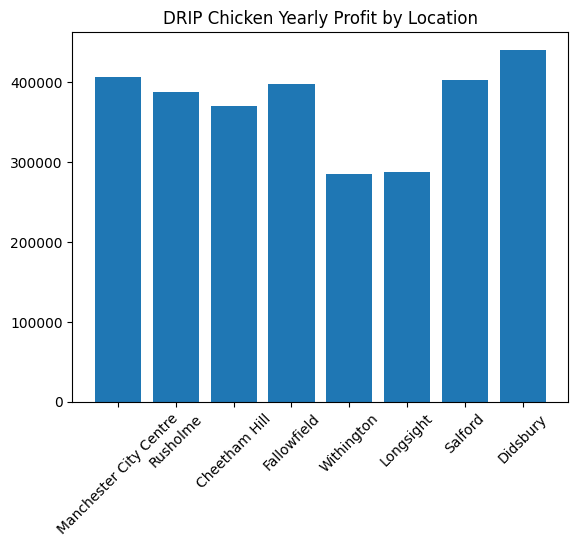

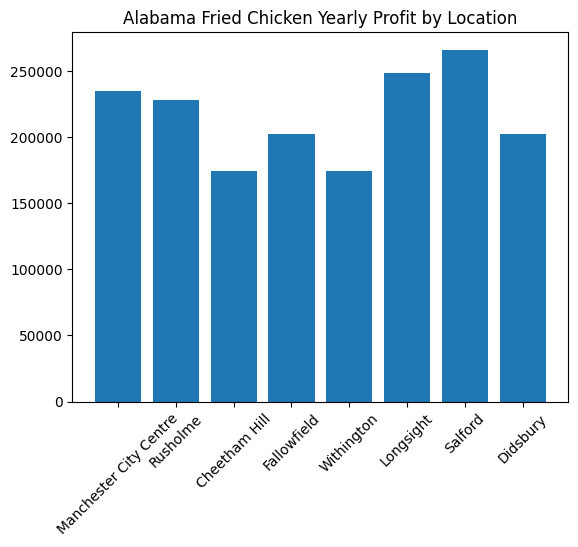

In [13]:
import matplotlib.pyplot as plt

for business in businesses:
    
    subset = df_manchester[df_manchester["Business"] == business]
    
    plt.figure()
    
    plt.bar(subset["Location"], subset["Yearly Profit (£)"])
    
    plt.title(f"{business} Yearly Profit by Location")
    plt.xticks(rotation=45)
    plt.show()

